Importing Libraries

In [11]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

Importing Data

In [12]:
df = pd.read_csv('municipality_bus_utilization.csv')

Suitable Dataframe Creating

In [13]:
# convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# extract hour from the timestamp column to create an time_hour column
hour = df['hour'] = df['timestamp'].dt.hour
#minute = df['minute'] = df['timestamp'].dt.minute
time = df['time'] = df['timestamp'].dt.date

print(df['timestamp'])

municipaly_id = df.iloc[:,1:2].values

municipaly_id = pd.DataFrame(data=municipaly_id, columns = ['municipaly_id'])

print(municipaly_id)

#Encoder
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#municipaly_id[:,0] = le.fit_transform(df.iloc[:,1:2])
#print(municipaly_id)
#ohe = preprocessing.OneHotEncoder()
#municipaly_id = ohe.fit_transform(municipaly_id).toarray()
#print(municipaly_id)
#mid = pd.DataFrame(data=municipaly_id, columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
#print(mid)

others = df.iloc[:,2:4].values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
impdata = others[:,:]
imputer = imputer.fit(impdata[:,:])
impdata[:,:] = imputer.transform(impdata[:,:])
finalothers = impdata[:,:]

finalothers = pd.DataFrame(data=finalothers, columns = ['usage', 'total_capacity'])
print(finalothers)

data = pd.concat([df['timestamp'], municipaly_id], axis=1)

print(data)

data = pd.concat([data, finalothers], axis=1)

print(data)

traindata = data.iloc[:10390,:]
testdata = data.iloc[10390:,:]

traindata = traindata.sort_values(["municipaly_id","timestamp"], ascending = (True,True))
testdata = testdata.sort_values(["municipaly_id","timestamp"], ascending = (True,True))

print(traindata)

traindata0 = traindata.iloc[:1039,:]
traindata1 = traindata.iloc[1039:2078,:]
traindata2 = traindata.iloc[2078:3117,:]
traindata3 = traindata.iloc[3117:4156,:]
traindata4 = traindata.iloc[4156:5195,:]
traindata5 = traindata.iloc[5195:6234,:]
traindata6 = traindata.iloc[6234:7273,:]
traindata7 = traindata.iloc[7273:8312,:]
traindata8 = traindata.iloc[8312:9351,:]
traindata9 = traindata.iloc[9351:,:]

print(traindata0)

print(traindata1)

print(traindata2)

print(traindata3)

print(traindata4)

print(traindata5)

print(traindata6)

print(traindata7)

print(traindata8)

print(traindata9)

#a = traindata.filter(columns = [regex='0$')
#print(a)

print(testdata)

testdata0 = testdata.iloc[:268,:]
testdata1 = testdata.iloc[268:536,:]
testdata2 = testdata.iloc[536:804,:]
testdata3 = testdata.iloc[804:1072,:]
testdata4 = testdata.iloc[1072:1340,:]
testdata5 = testdata.iloc[1340:1608,:]
testdata6 = testdata.iloc[1608:1876,:]
testdata7 = testdata.iloc[1876:2144,:]
testdata8 = testdata.iloc[2144:2412,:]
testdata9 = testdata.iloc[2412:,:]

print(testdata0)

print(testdata1)

print(testdata2)

print(testdata3)

print(testdata4)

print(testdata5)

print(testdata6)

print(testdata7)

print(testdata8)

print(testdata9)

0       2017-04-06 07:59:00
1       2017-04-06 07:59:00
2       2017-04-06 07:59:00
3       2017-04-06 07:59:00
4       2017-04-06 07:59:00
                ...        
13065   2017-08-19 16:30:00
13066   2017-08-19 16:30:00
13067   2017-08-19 16:30:00
13068   2017-08-19 16:30:00
13069   2017-08-19 16:30:00
Name: timestamp, Length: 13070, dtype: datetime64[ns]
       municipaly_id
0                  9
1                  8
2                  4
3                  0
4                  7
...              ...
13065              2
13066              8
13067              7
13068              6
13069              3

[13070 rows x 1 columns]
       usage  total_capacity
0        454            1332
1        556            2947
2       1090            3893
3        204            2813
4        718            2019
...      ...             ...
13065    548             697
13066   1193            2947
13067   1354            2019
13068   1680            3113
13069   1189            1930

[13070 rows

According to hours, Selecting Maximum Value

In [14]:
finaldata = traindata.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

finaldata0 = traindata0.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tsdata0 = traindata0.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tsdata0)

finaldata1 = traindata1.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tsdata1 = traindata1.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tsdata1)

finaldata2 = traindata2.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tsdata2 = traindata2.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tsdata2)

finaldata3 = traindata3.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tsdata3 = traindata3.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tsdata3)

finaldata4 = traindata4.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tsdata4 = traindata4.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tsdata4)

finaldata5 = traindata5.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tsdata5 = traindata5.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tsdata5)

finaldata6 = traindata6.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tsdata6 = traindata6.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tsdata6)

finaldata7 = traindata7.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tsdata7 = traindata7.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tsdata7)

finaldata8 = traindata8.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tsdata8 = traindata8.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tsdata8)

finaldata9 = traindata9.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tsdata9 = traindata9.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tsdata9)

print(finaldata)

print(finaldata0)

print(finaldata1)

print(finaldata2)

print(finaldata3)

print(finaldata4)

print(finaldata5)

print(finaldata6)

print(finaldata7)

print(finaldata8)

print(finaldata9)

trydata = testdata.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

trydata0 = testdata0.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tstdata0 = testdata0.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(trydata0)

trydata1 = testdata1.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tstdata1 = testdata1.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tstdata1)

trydata2 = testdata2.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tstdata2 = testdata2.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tstdata2)

trydata3 = testdata3.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tstdata3 = testdata3.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tstdata3)

trydata4 = testdata4.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tstdata4 = testdata4.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tstdata4)

trydata5 = testdata5.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tstdata5 = testdata5.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tstdata5)

trydata6 = testdata6.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tstdata6 = testdata6.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tstdata6)

trydata7 = testdata7.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tstdata7 = testdata7.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tstdata7)

trydata8 = testdata8.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tstdata8 = testdata8.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tstdata8)

trydata9 = testdata9.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipaly_id'], as_index=False)['usage'].max()

tstdata9 = testdata9.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

print(tstdata9)

print(trydata)

print(trydata0)

print(trydata1)

print(trydata2)

print(trydata3)

print(trydata4)

print(trydata5)

print(trydata6)

print(trydata7)

print(trydata8)

print(trydata9)

timestamp
2017-01-07 08:00:00    228.0
2017-01-07 09:00:00    360.0
2017-01-07 10:00:00    446.0
2017-01-07 11:00:00    509.0
2017-01-07 12:00:00    529.0
                       ...  
2017-12-07 12:00:00    455.0
2017-12-07 13:00:00    512.0
2017-12-07 14:00:00    525.0
2017-12-07 15:00:00    513.0
2017-12-07 16:00:00    459.0
Freq: H, Name: usage, Length: 8025, dtype: float64
timestamp
2017-01-07 08:00:00    113.0
2017-01-07 09:00:00    164.0
2017-01-07 10:00:00    231.0
2017-01-07 11:00:00    279.0
2017-01-07 12:00:00    288.0
                       ...  
2017-12-07 12:00:00    308.0
2017-12-07 13:00:00    345.0
2017-12-07 14:00:00    354.0
2017-12-07 15:00:00    354.0
2017-12-07 16:00:00    353.0
Freq: H, Name: usage, Length: 8025, dtype: float64
timestamp
2017-01-07 08:00:00    361.0
2017-01-07 09:00:00    462.0
2017-01-07 10:00:00    576.0
2017-01-07 11:00:00    619.0
2017-01-07 12:00:00    656.0
                       ...  
2017-12-07 12:00:00    415.0
2017-12-07 13:00:00    482.

Forecasting

532    228.000000
533    228.000000
534    359.340000
535    445.566700
536    508.682833
          ...    
669    677.804040
670    666.059020
671    551.575295
672    459.462876
673    338.607314
Length: 142, dtype: float64
532    113.000000
533    113.000000
534    163.745000
535    230.663725
536    278.758319
          ...    
669    353.999999
670    354.000000
671    354.000000
672    315.195000
673    262.265975
Length: 142, dtype: float64
532    361.000000
533    361.000000
534    461.495000
535    575.427475
536    618.782137
          ...    
669    632.618066
670    648.918090
671    592.284590
672    529.316423
673    390.696582
Length: 142, dtype: float64
532     757.000000
533     757.000000
534    1096.295000
535    1333.806475
536    1405.639032
          ...     
669     976.457047
670     974.012285
671     880.470061
672     723.787350
673     480.223937
Length: 142, dtype: float64
532    1493.000013
533    1493.000000
534    2353.999987
535    2928.999991
536    31

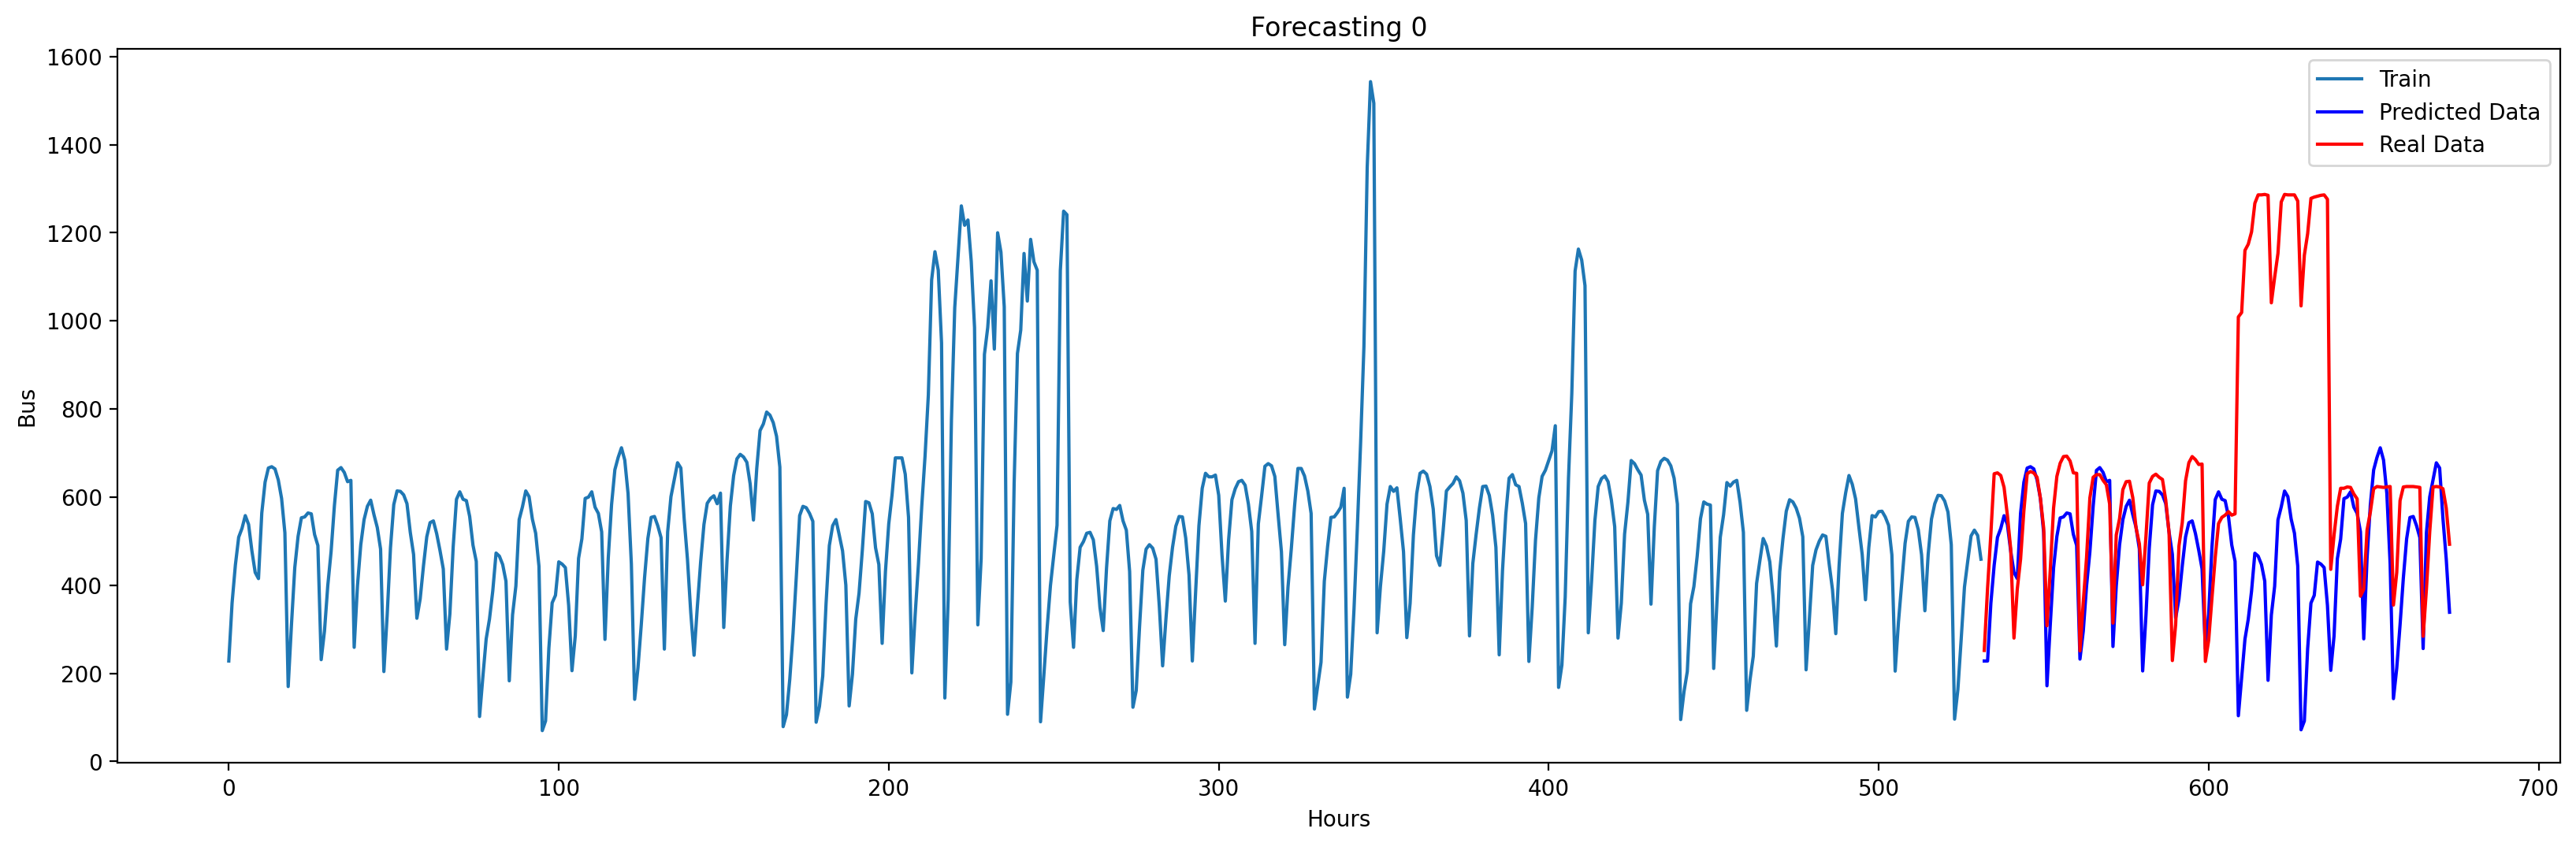

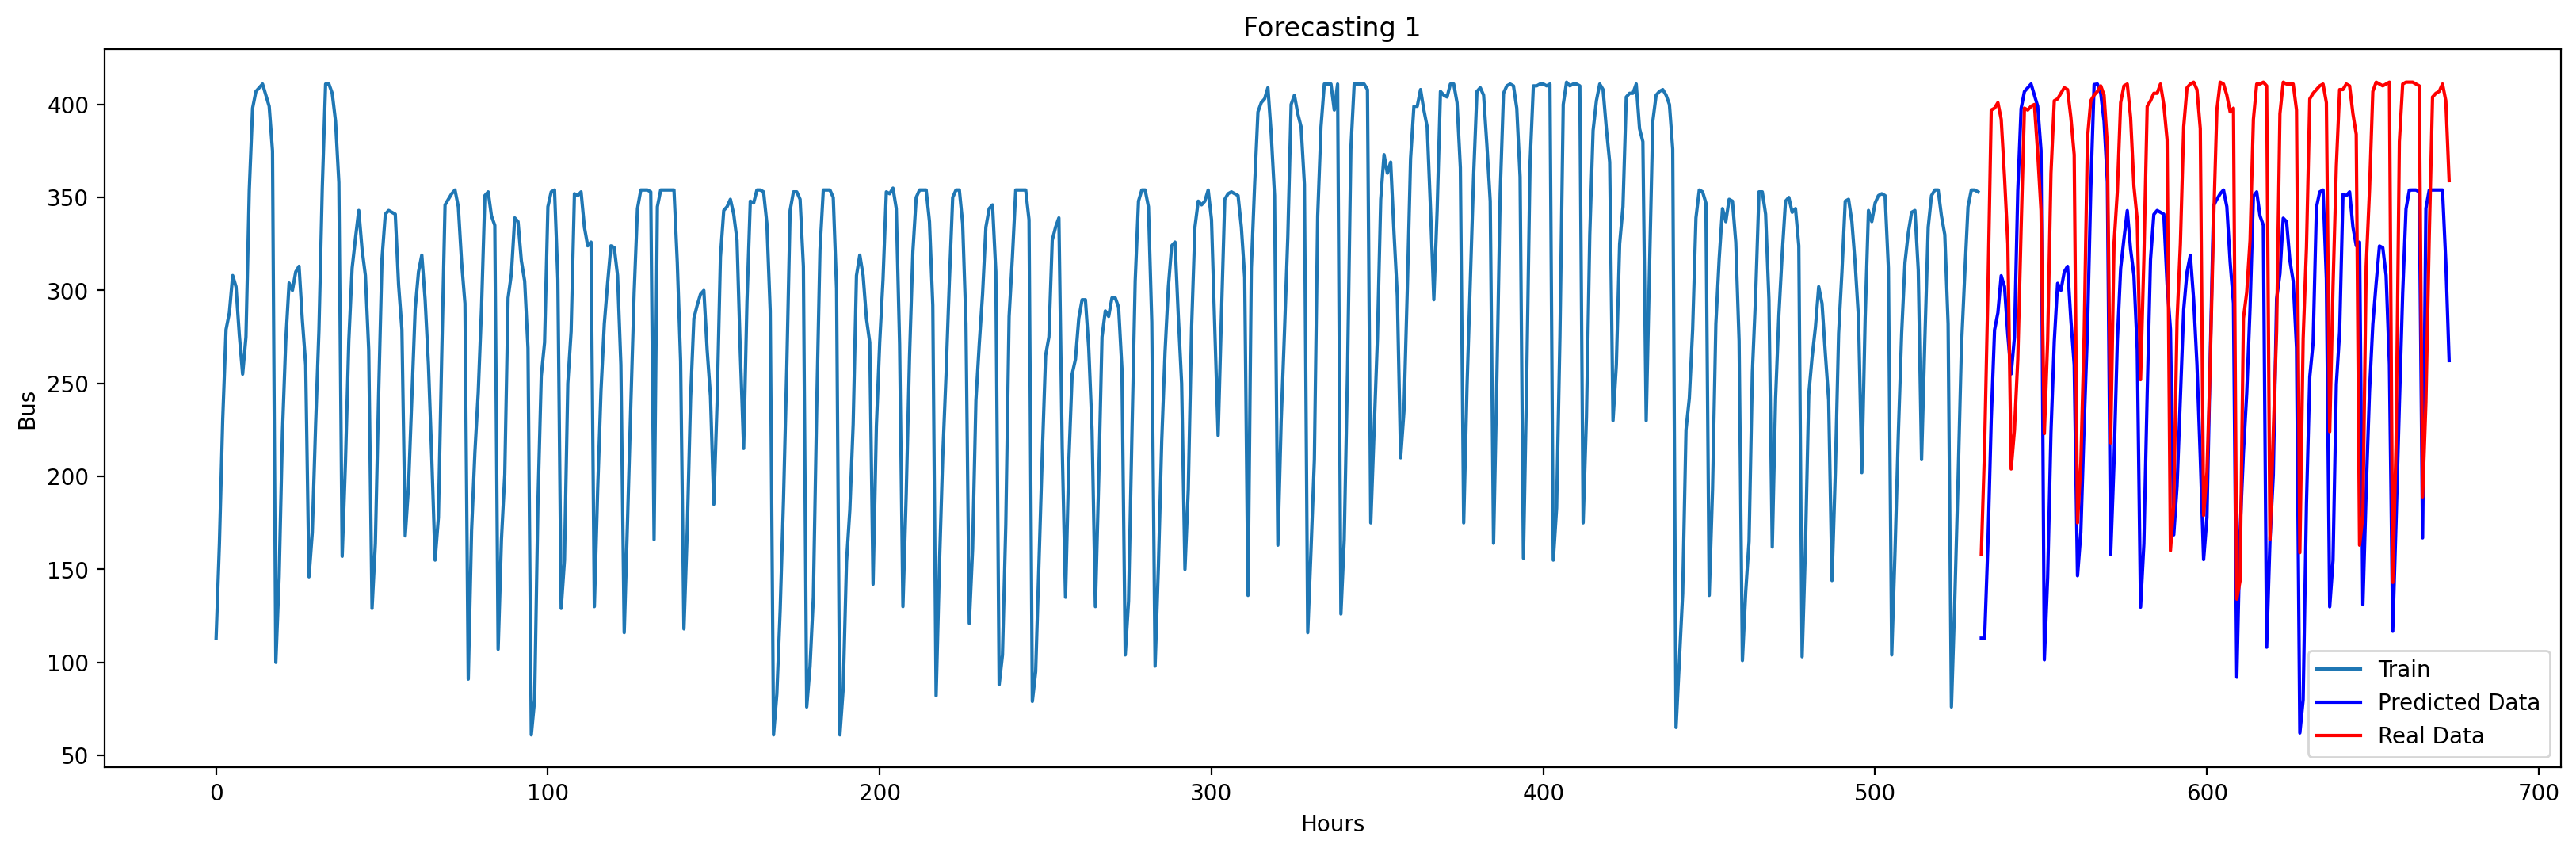

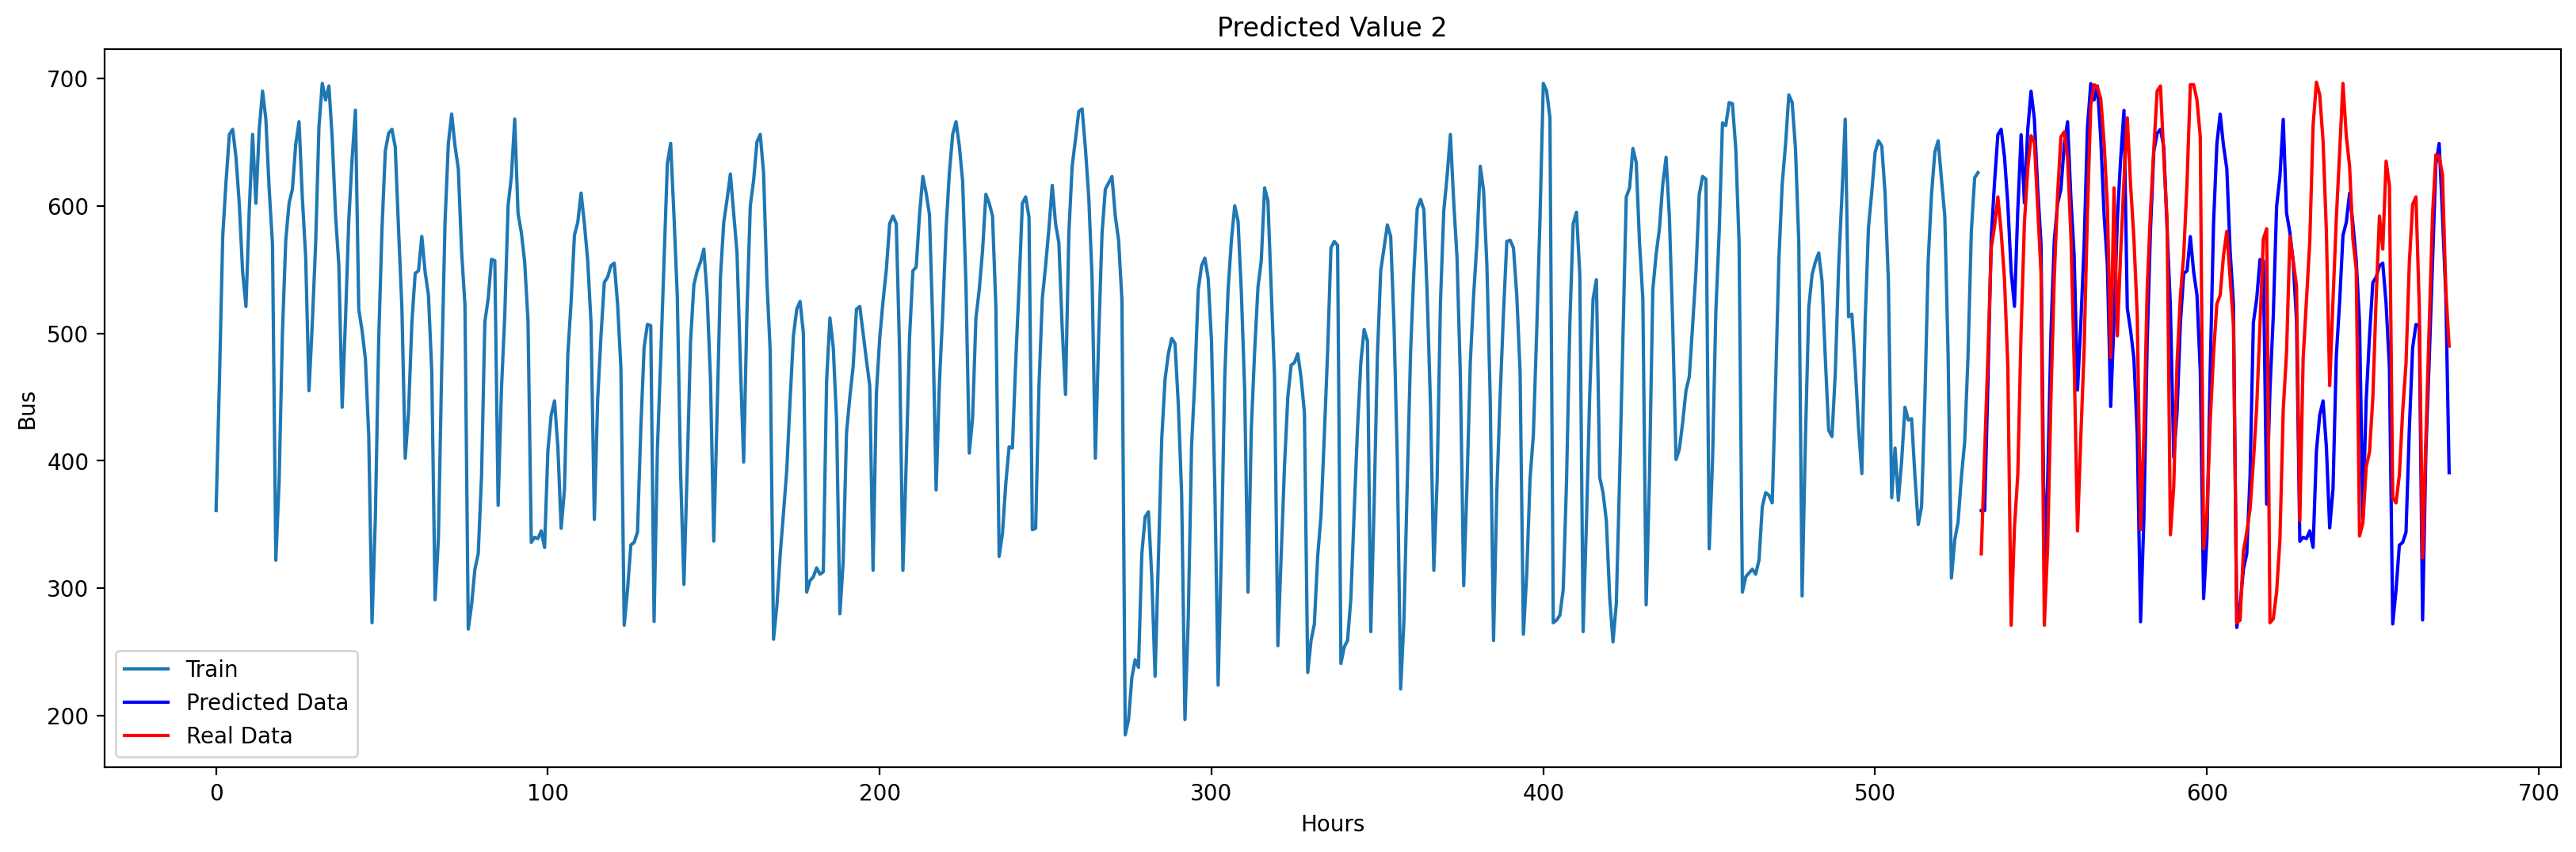

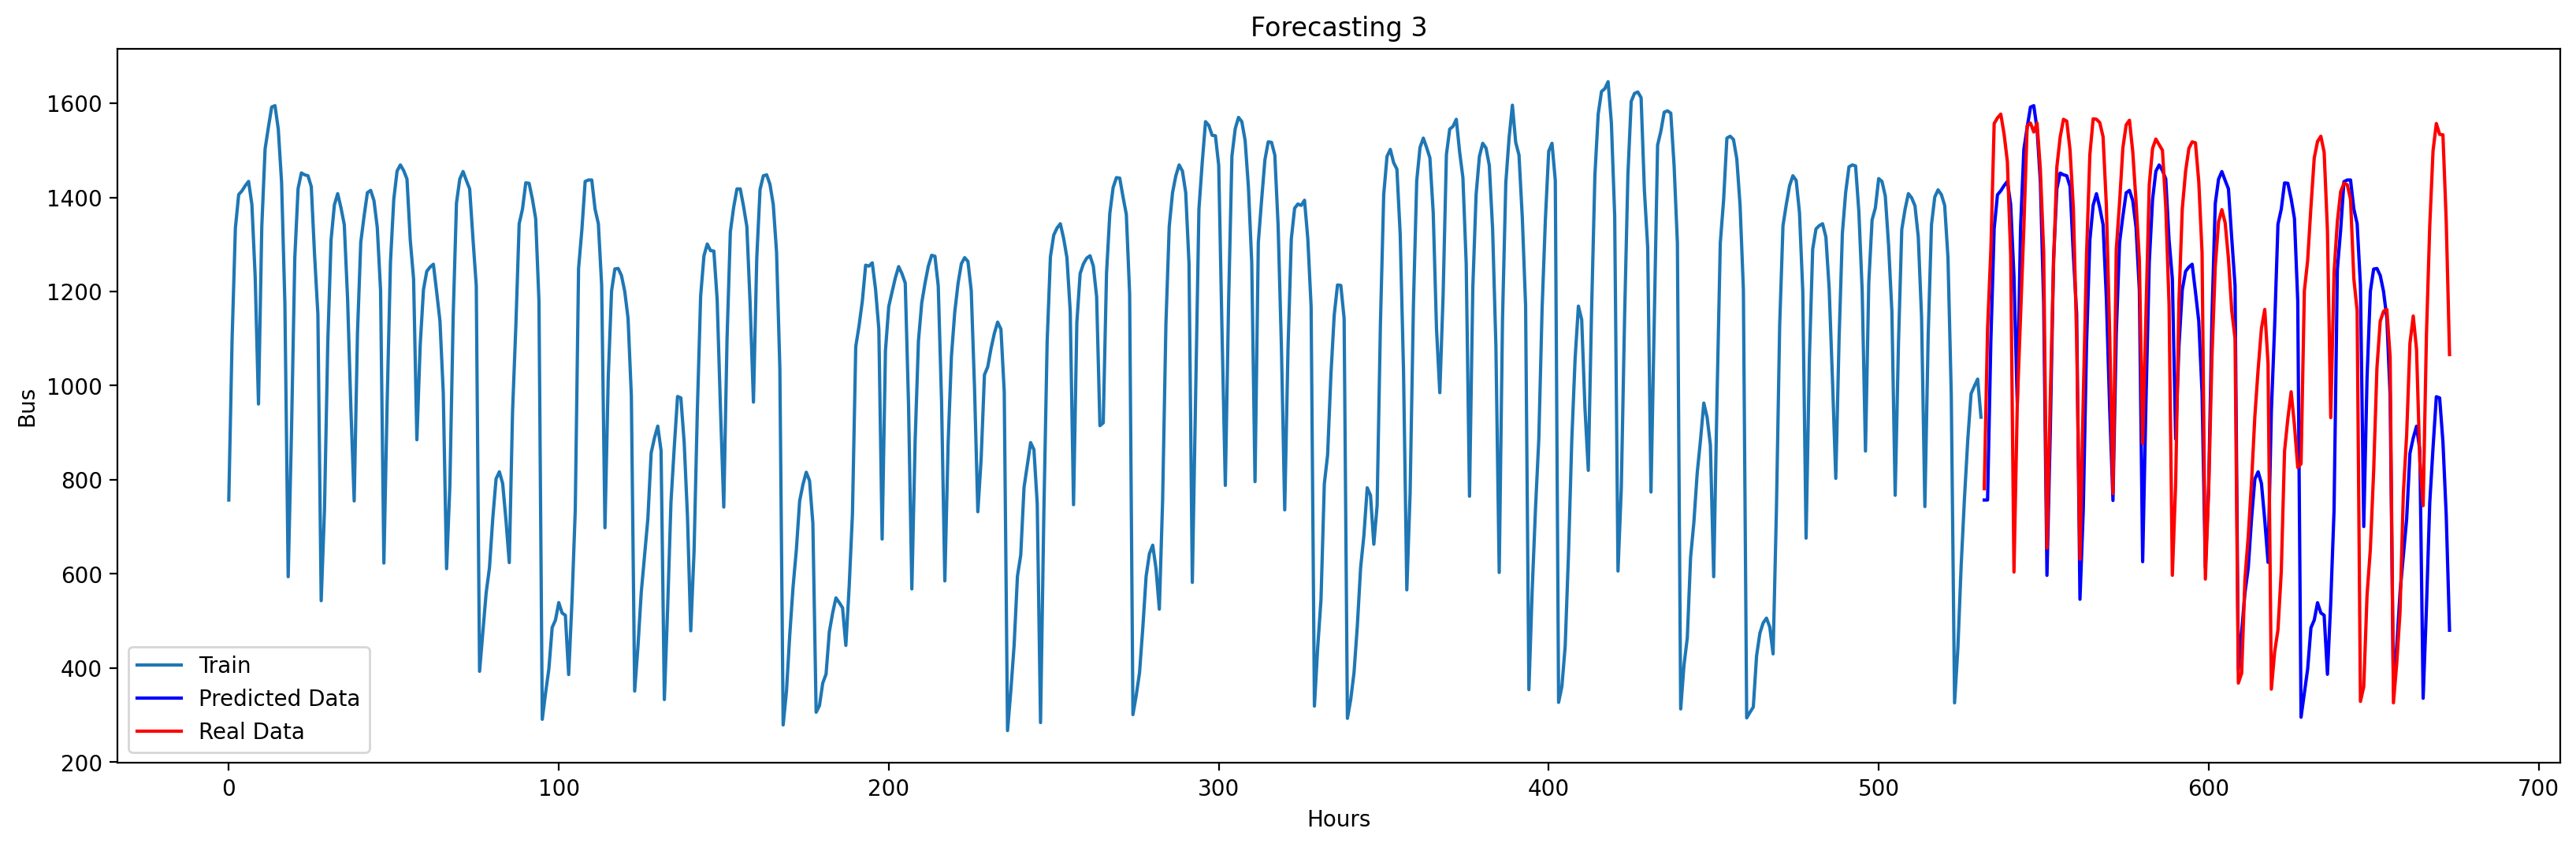

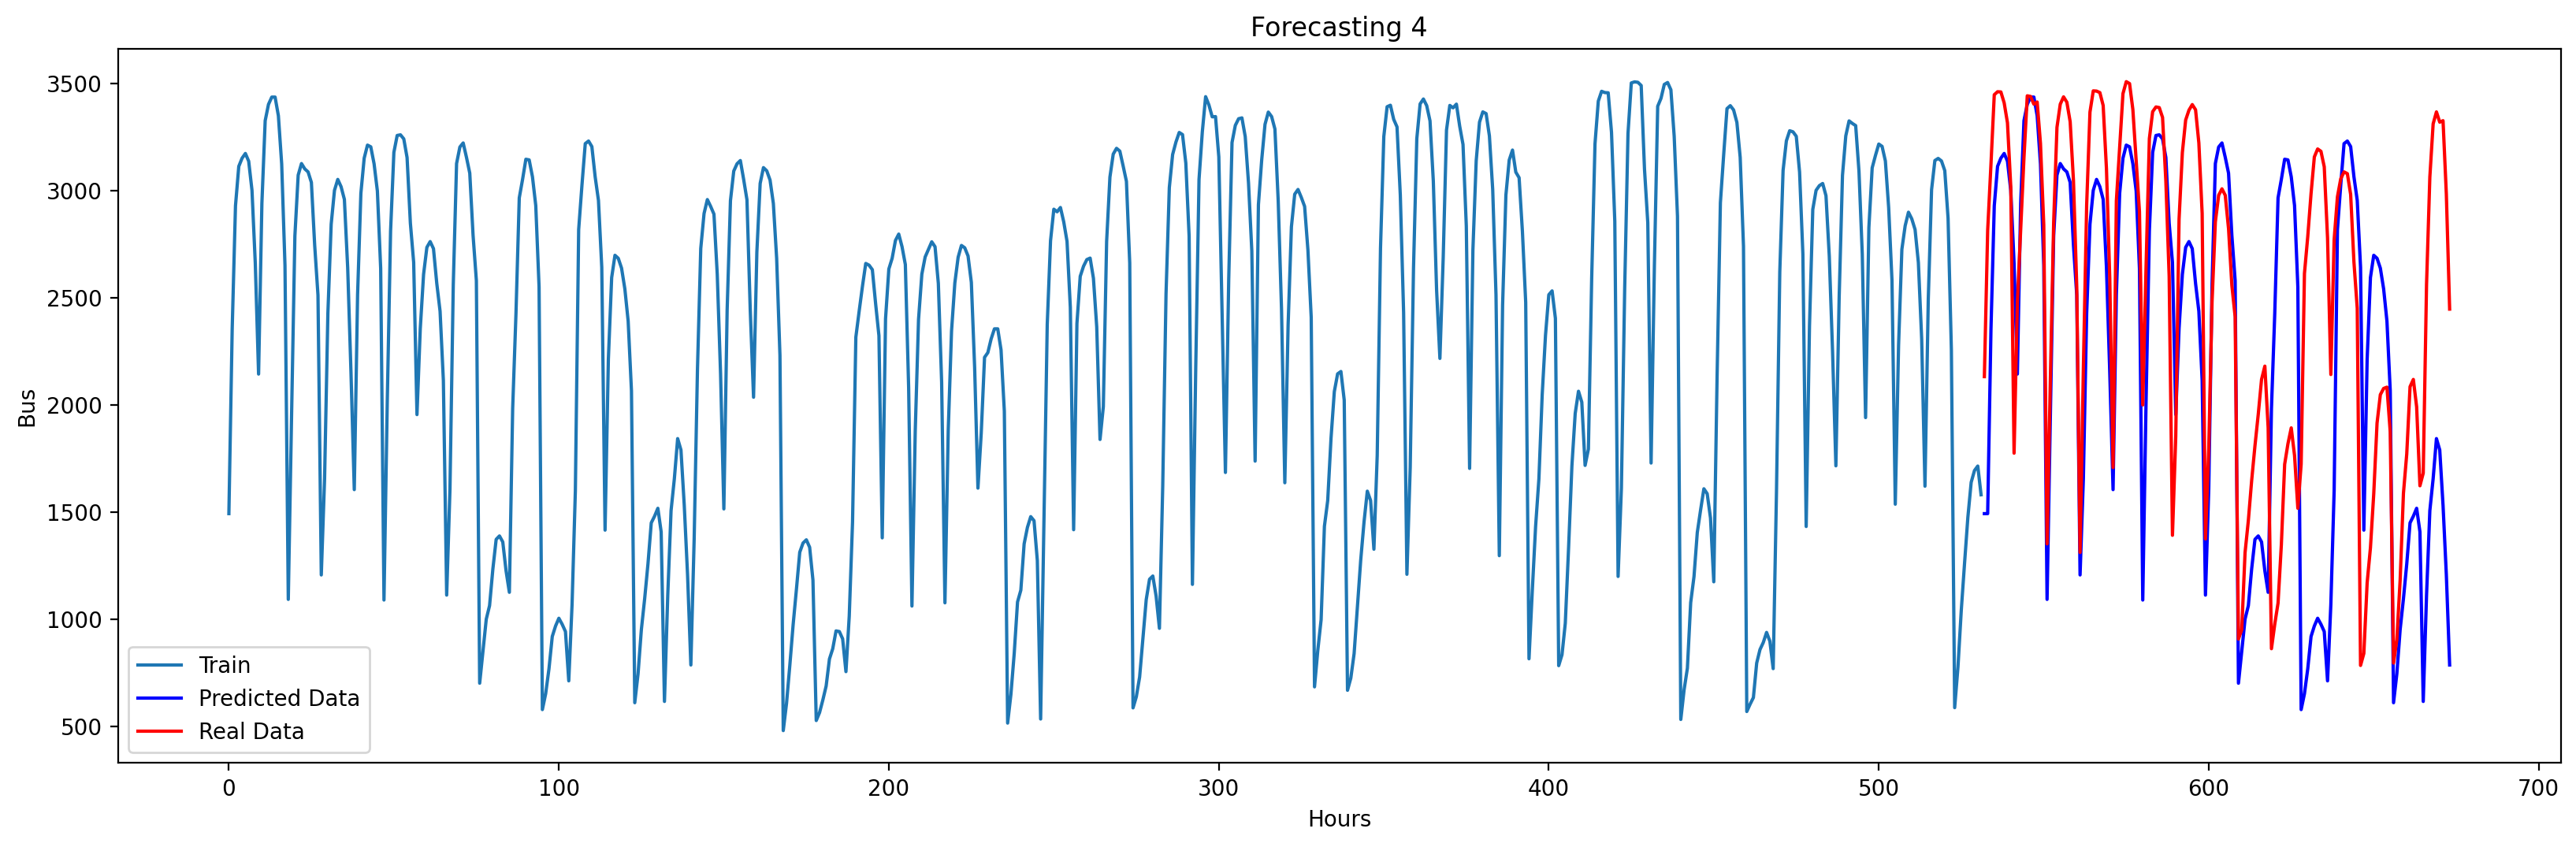

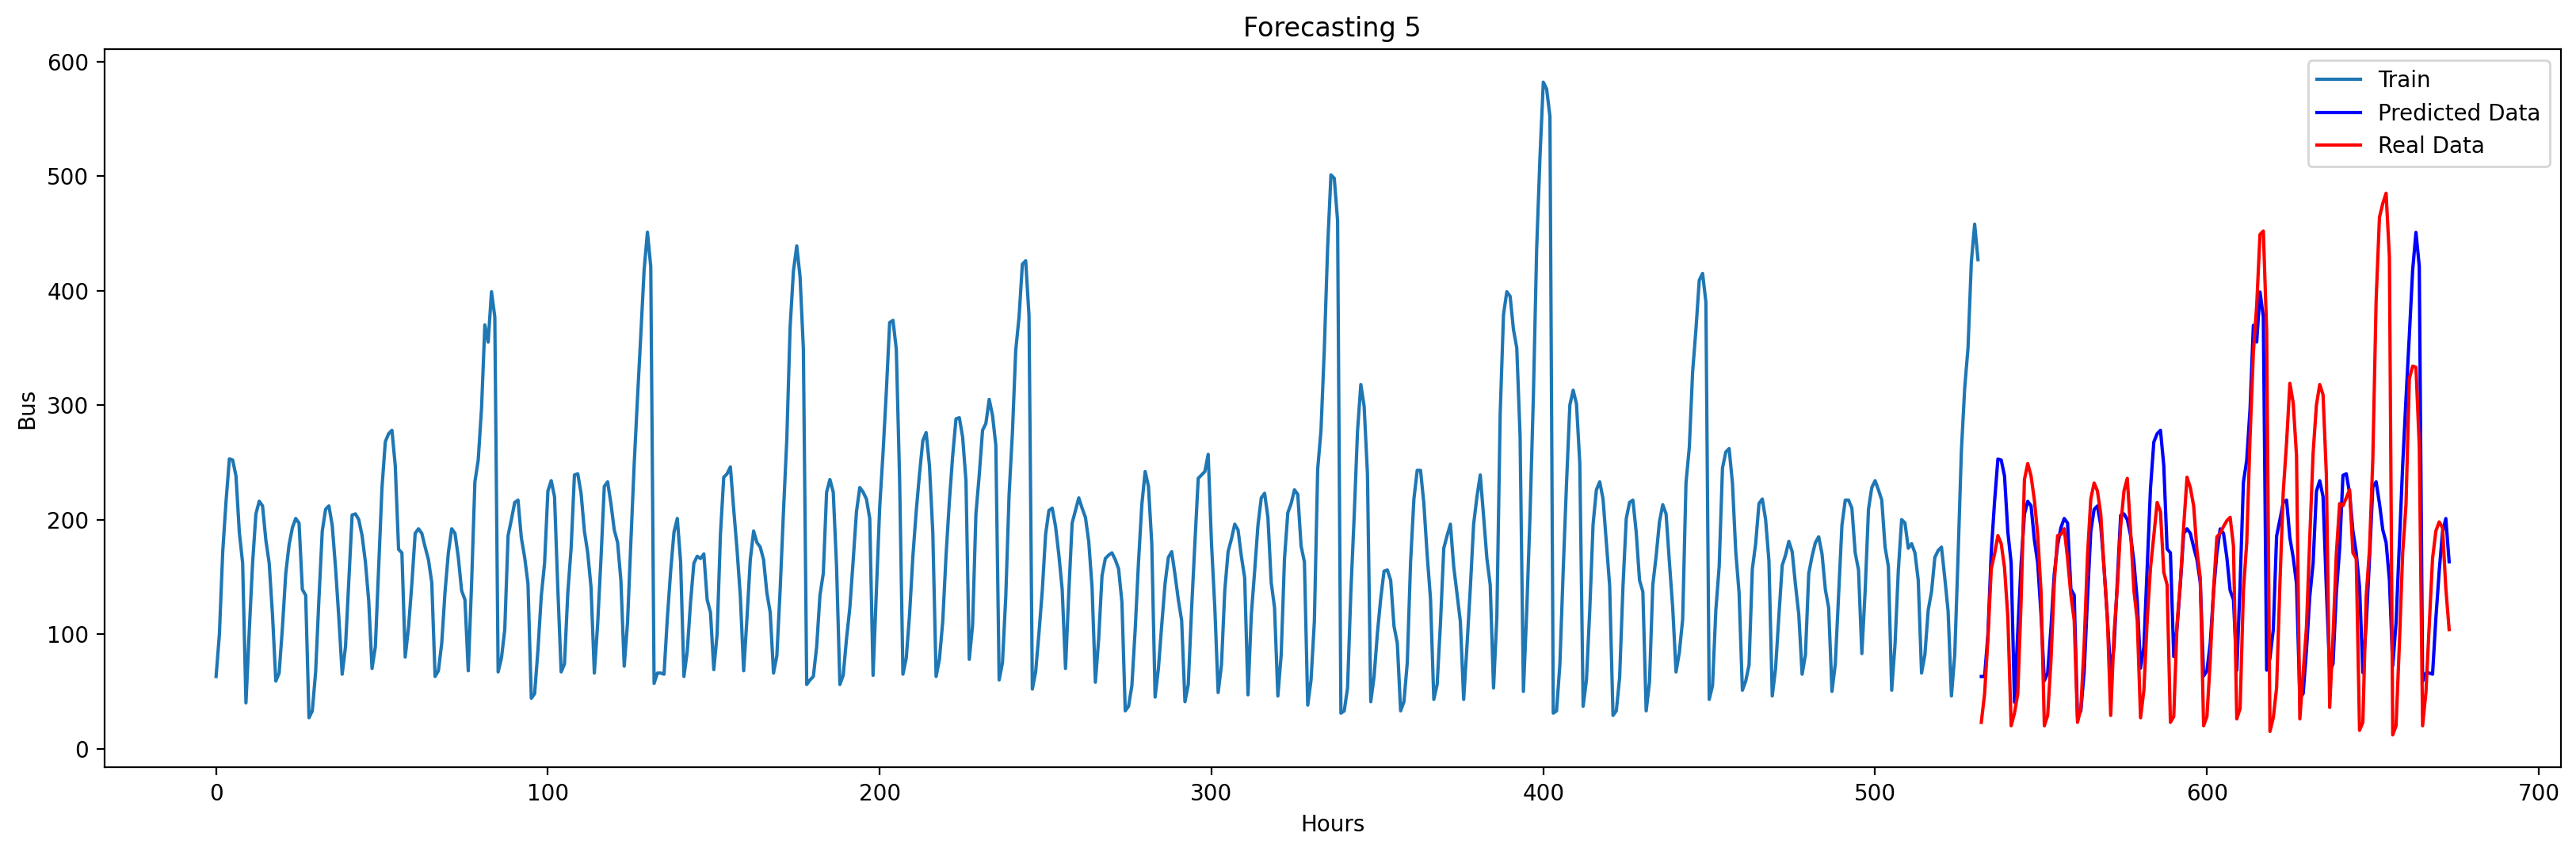

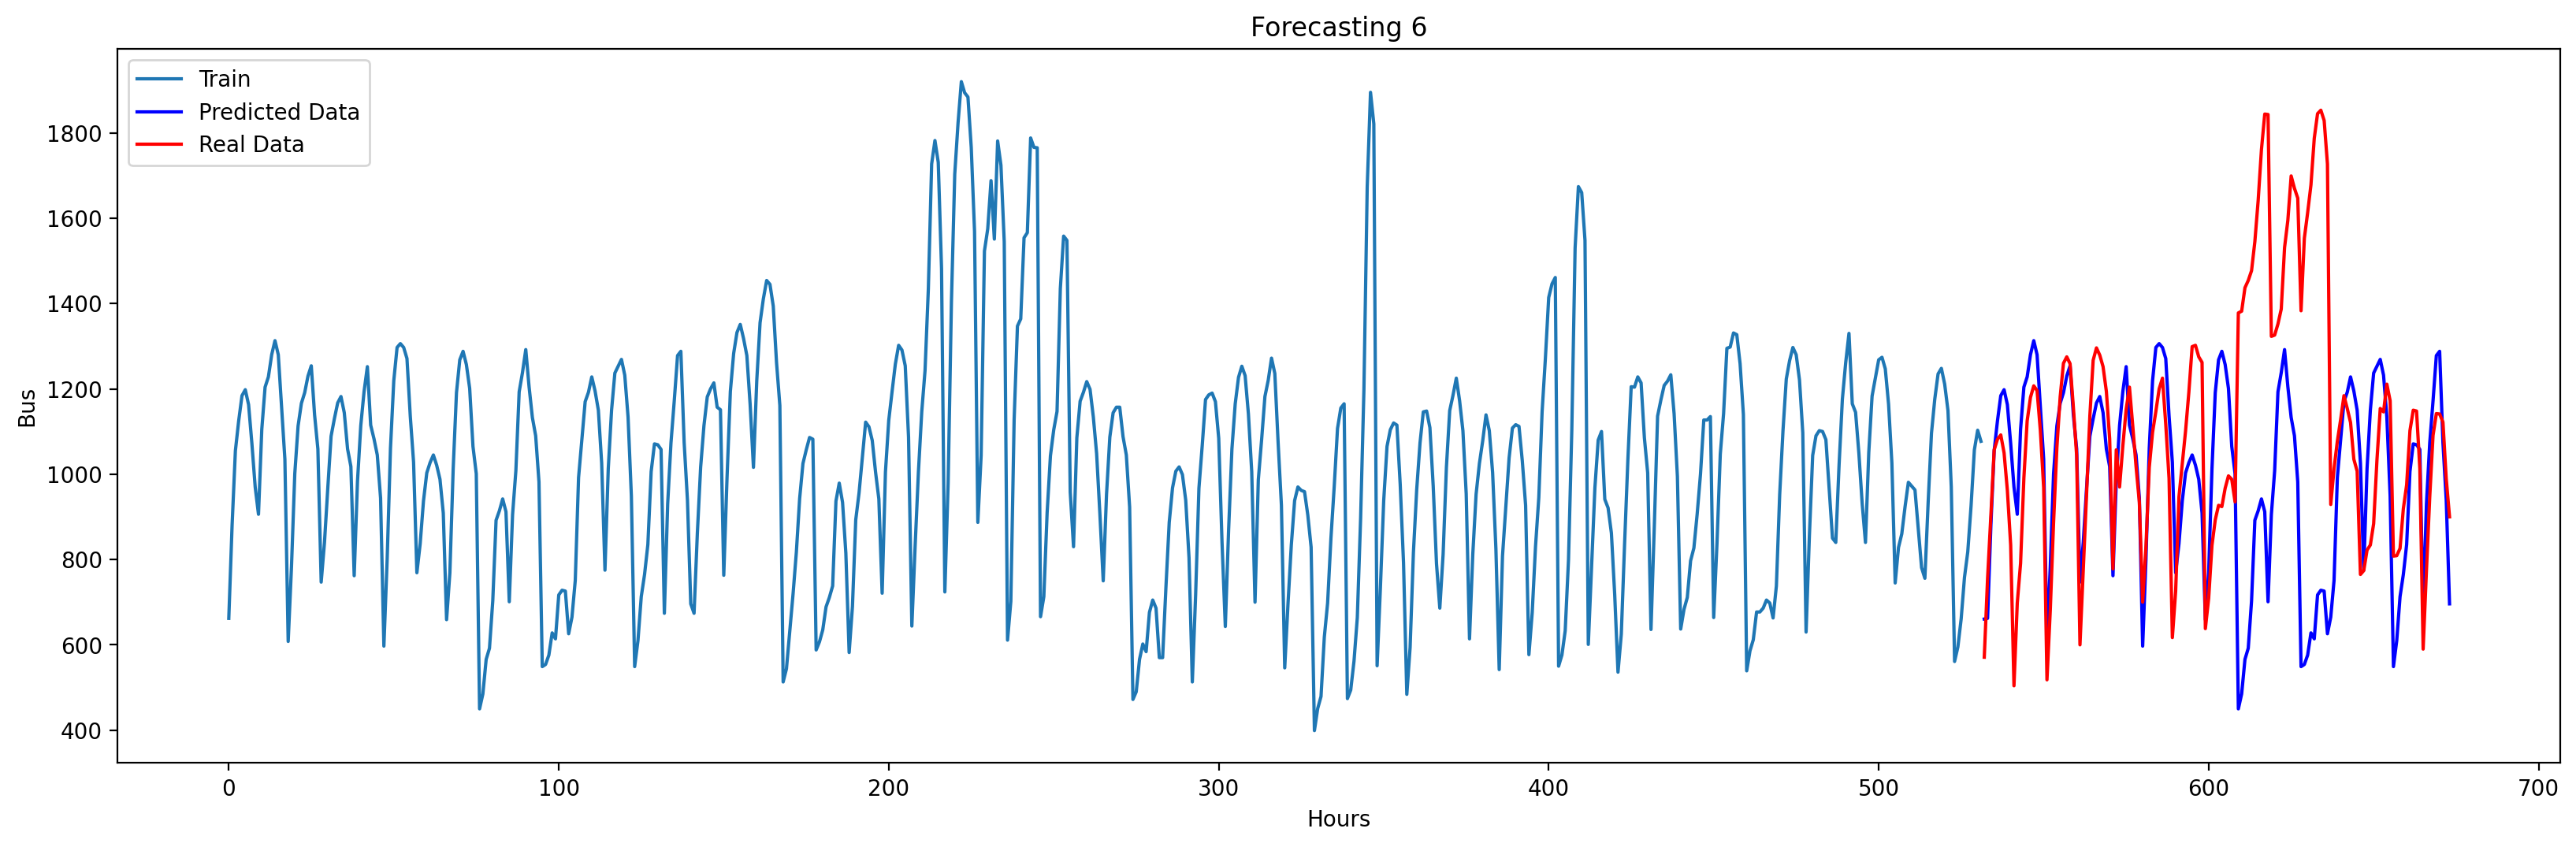

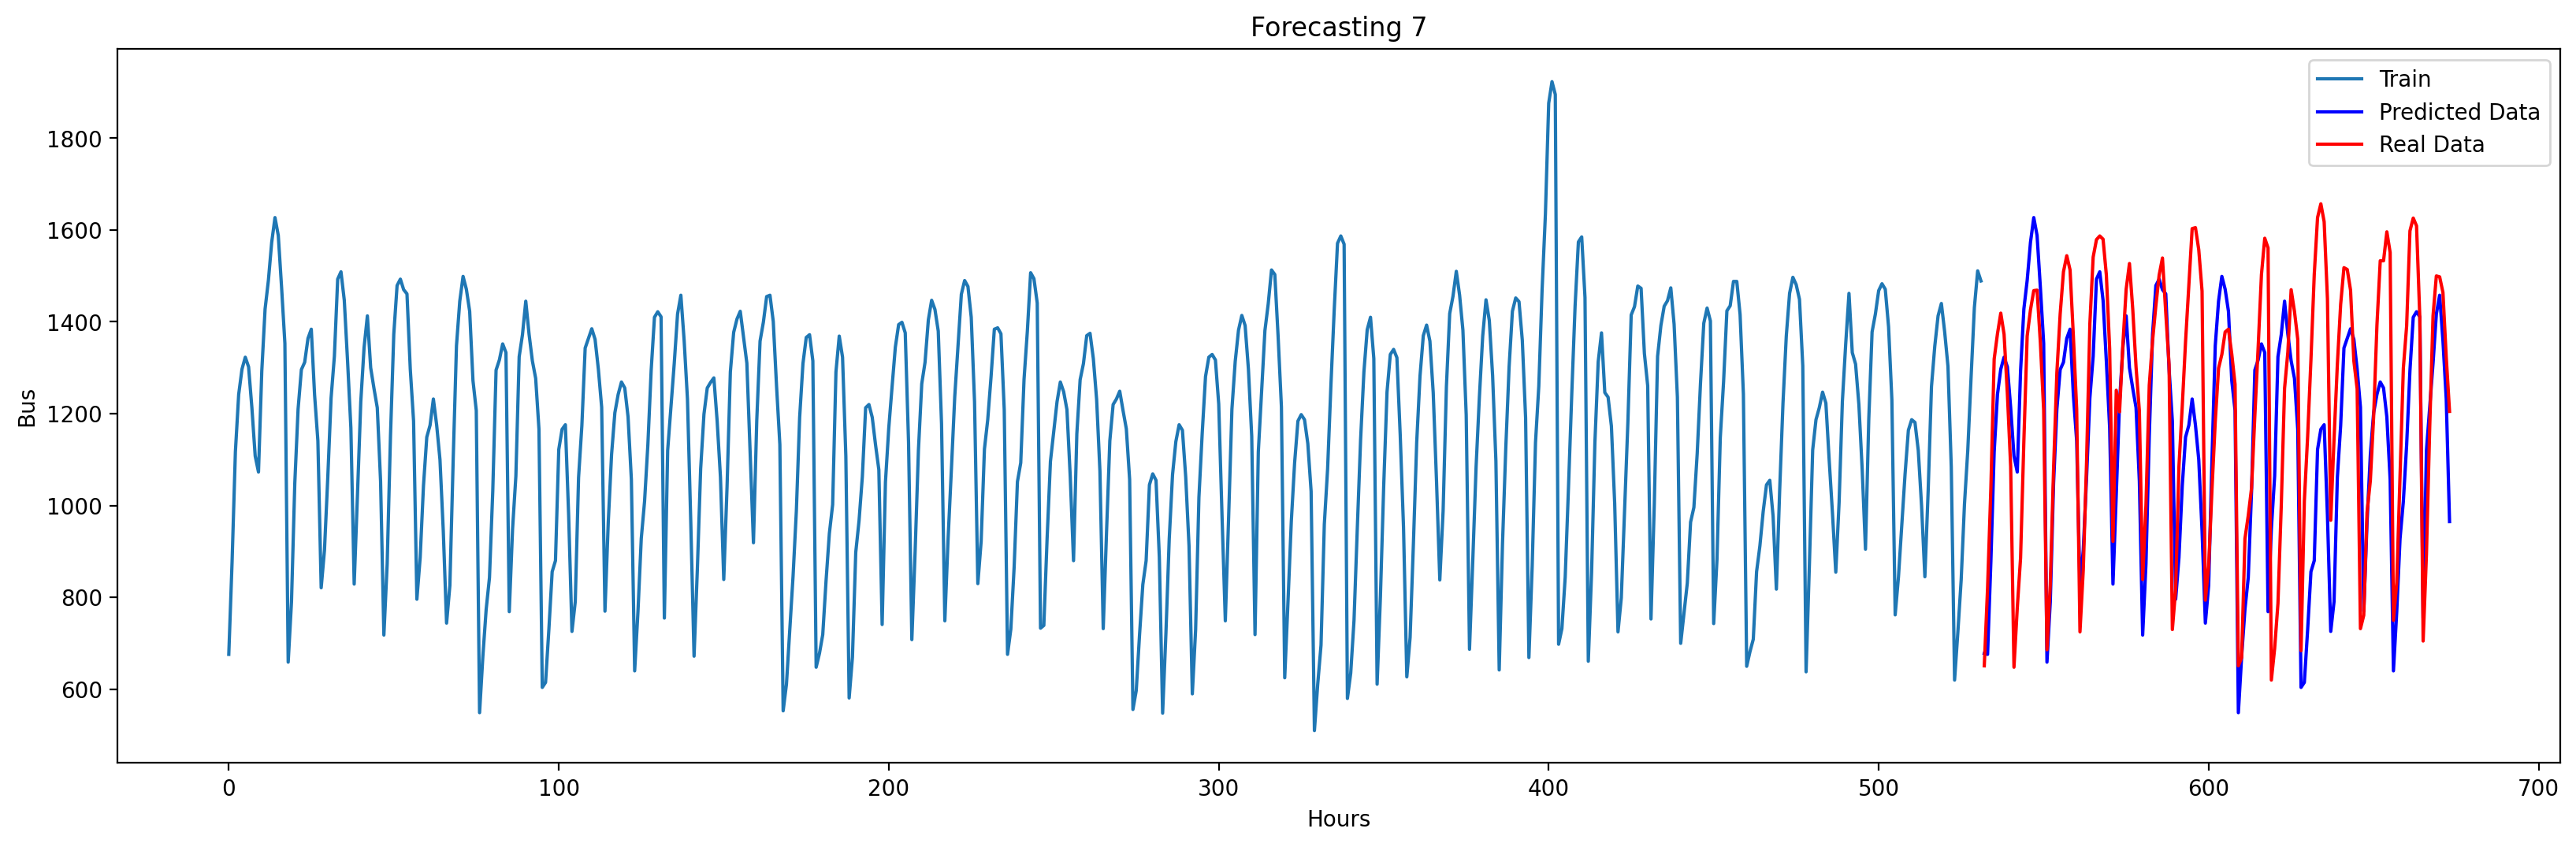

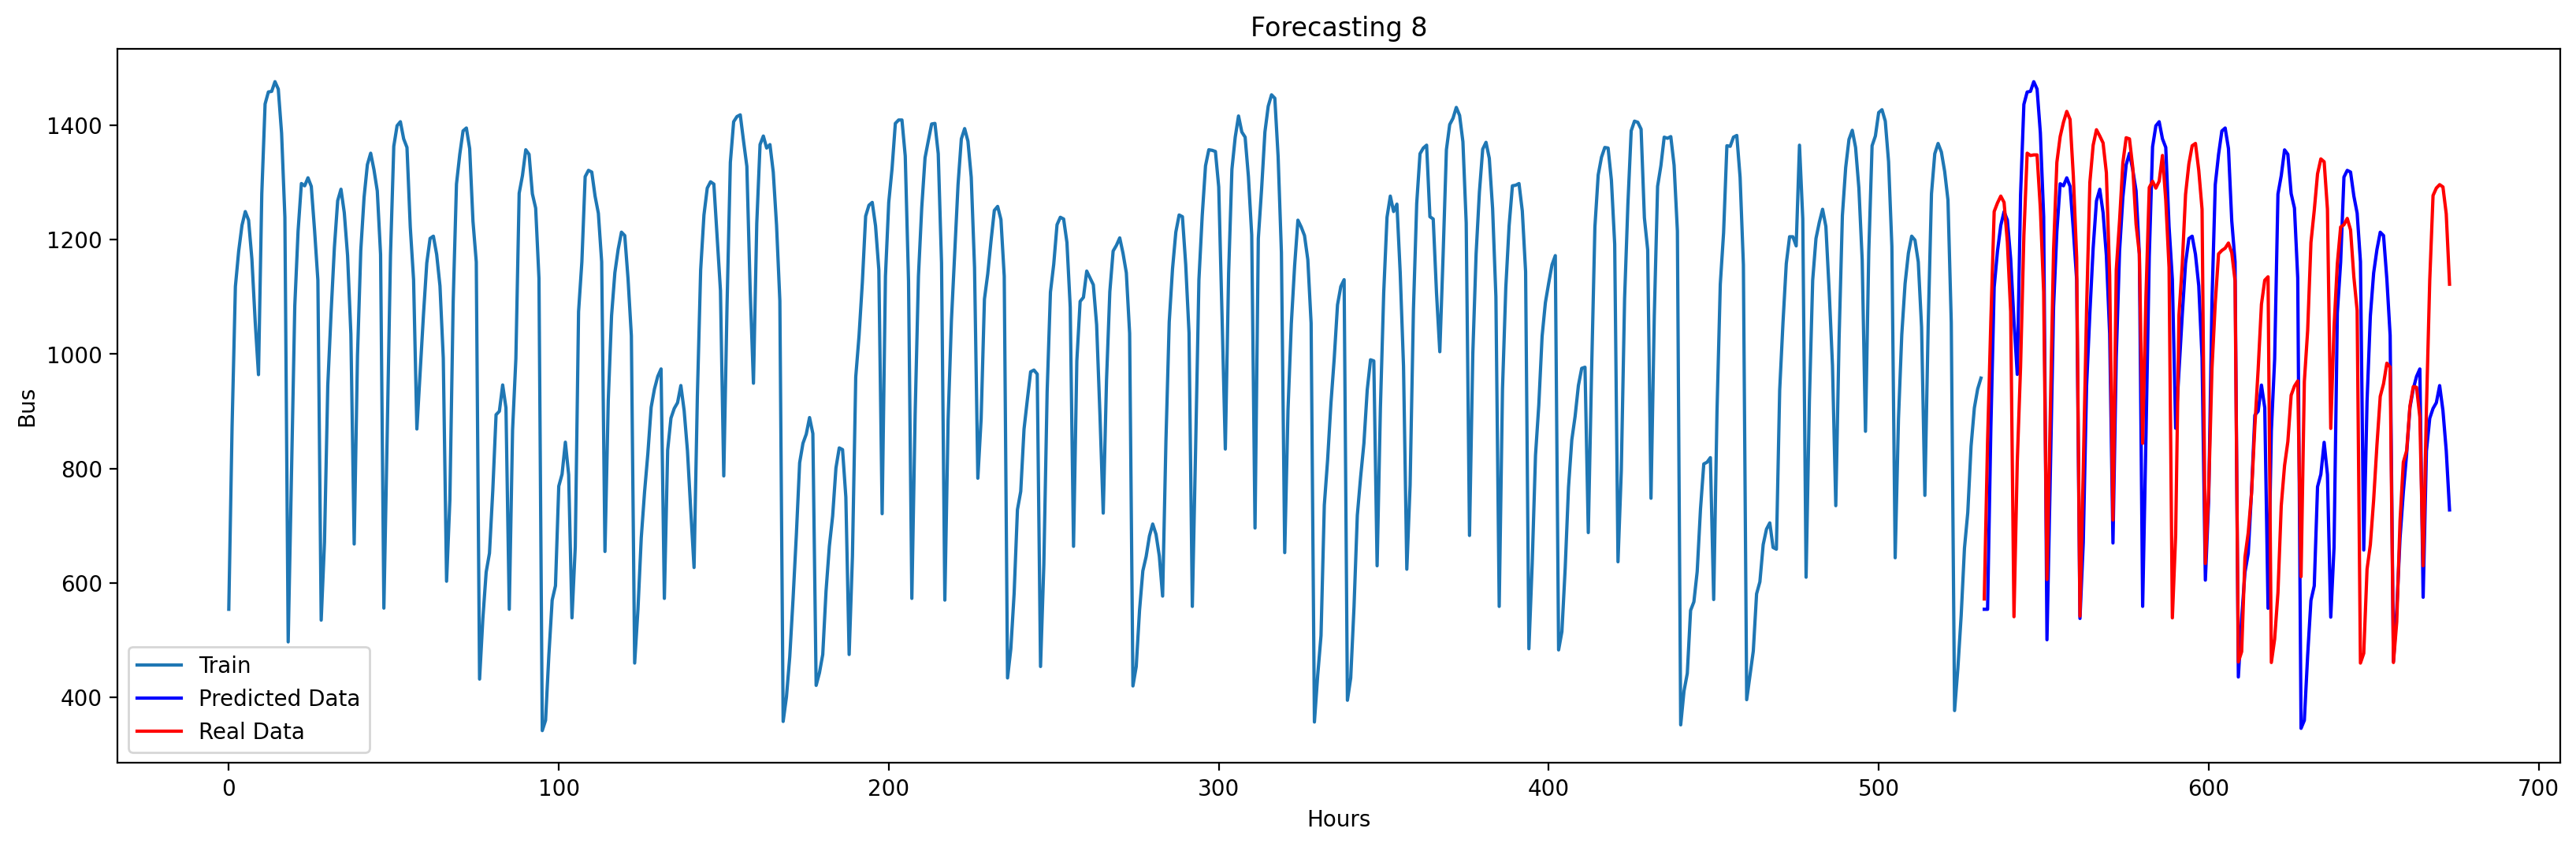

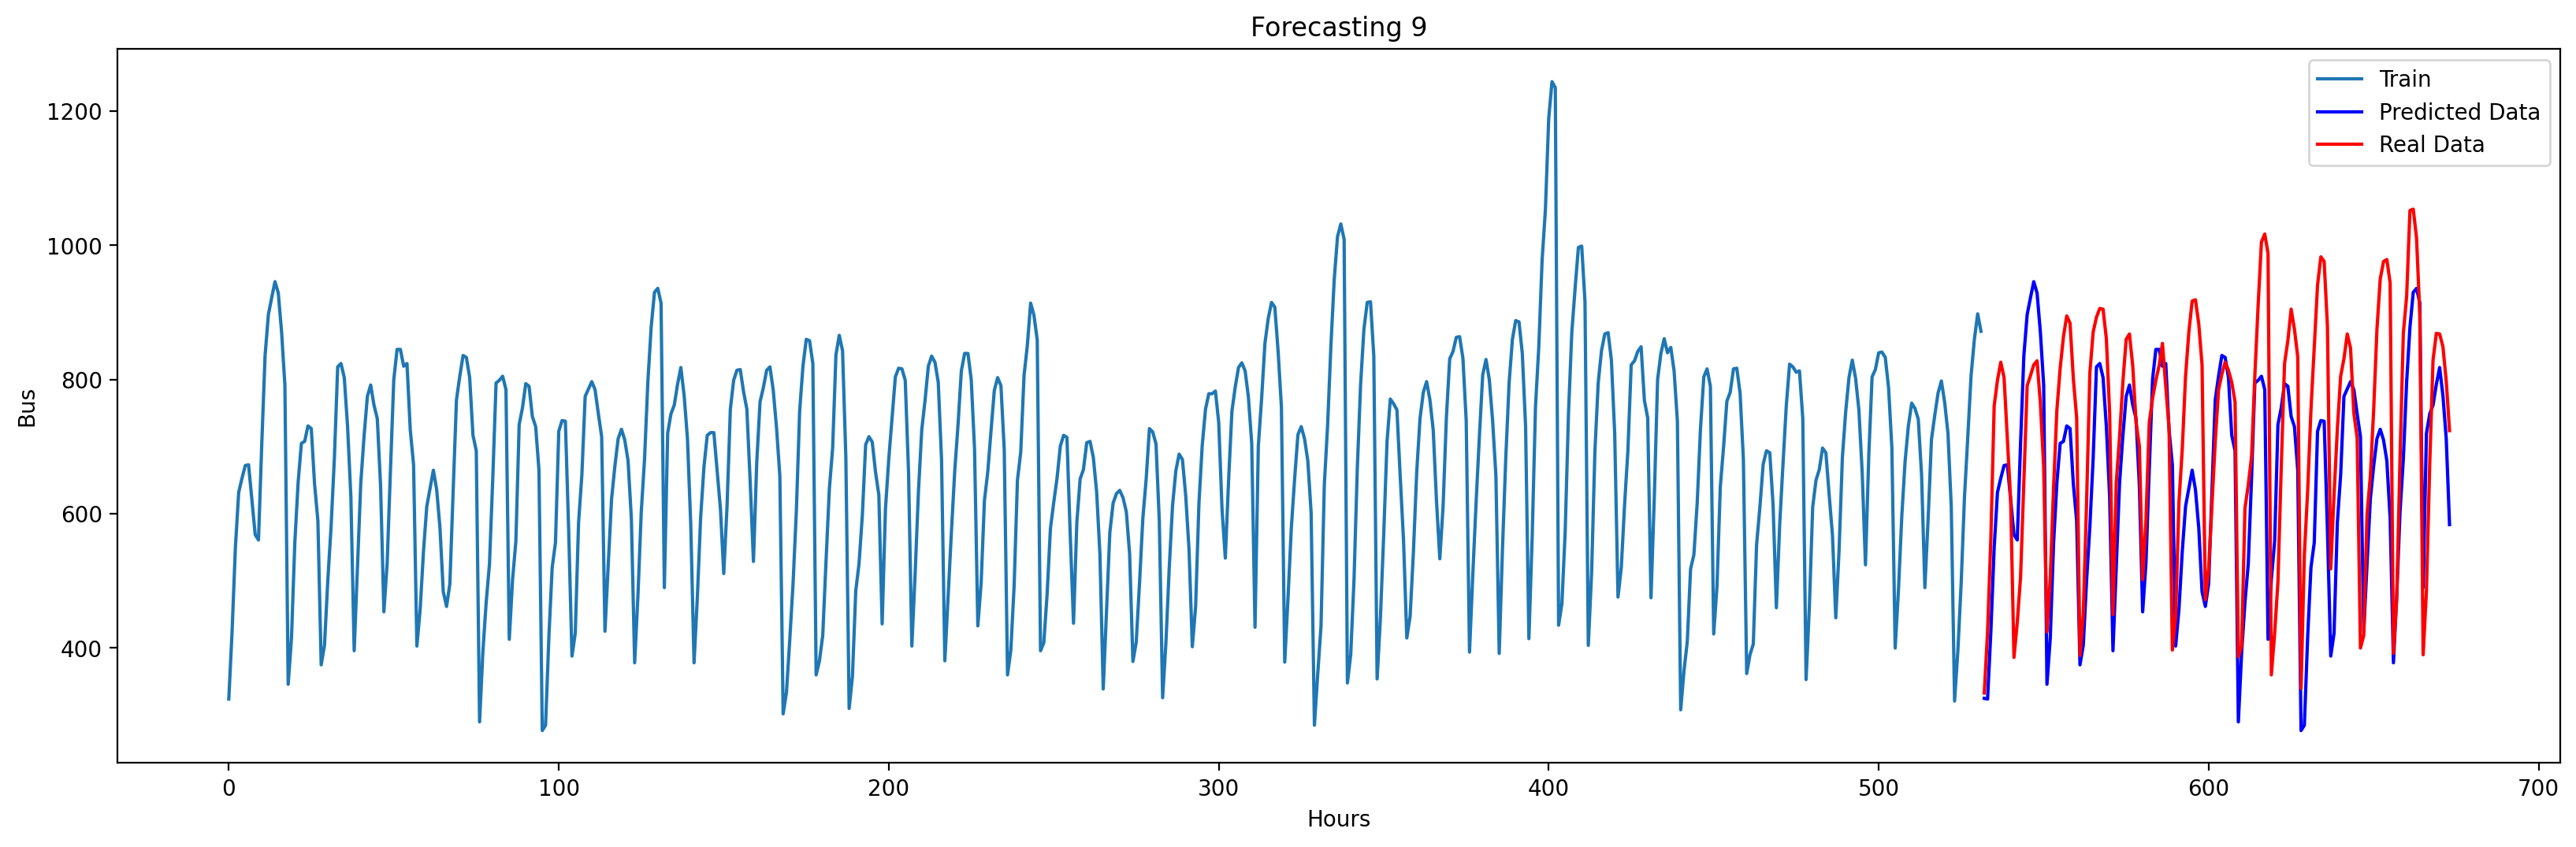

In [15]:
warnings.filterwarnings("ignore")

# Predict0
model0 = ExponentialSmoothing(finaldata0["usage"], trend=None, seasonal=None, seasonal_periods=None)
hw_model0 = model0.fit(optimized=True, use_boxcox=False, remove_bias=False)
pred0 = hw_model0.predict(start=trydata0["usage"].index[0], end=trydata0["usage"].index[-1])

pred0.index += len(finaldata0)

trydata0.index += len(finaldata0)

print(pred0)

plt.figure(figsize=(20, 6), dpi=200);plt.plot(finaldata0["usage"].index, finaldata0["usage"], label='Train'); plt.plot(pred0.index, pred0, 'b-', label = 'Predicted Data'); plt.plot(trydata0["usage"].index, trydata0["usage"], 'r-', label = 'Real Data'); plt.xlabel('Hours'); plt.ylabel('Bus'); plt.title('Forecasting 0'); plt.legend(loc="best");

# Predict1
model1 = ExponentialSmoothing(finaldata1["usage"], trend=None, seasonal=None, seasonal_periods=None)
hw_model1 = model1.fit(optimized=True, use_boxcox=False, remove_bias=False)
pred1 = hw_model1.predict(start=trydata1["usage"].index[0], end=trydata1["usage"].index[-1])

pred1.index += len(finaldata1)

trydata1.index += len(finaldata1)

print(pred1)

plt.figure(figsize=(20, 6), dpi=200);plt.plot(finaldata1["usage"].index, finaldata1["usage"], label='Train'); plt.plot(pred1.index, pred1, 'b-', label = 'Predicted Data'); plt.plot(trydata1["usage"].index, trydata1["usage"], 'r-', label = 'Real Data'); plt.xlabel('Hours'); plt.ylabel('Bus'); plt.title('Forecasting 1'); plt.legend(loc="best");

# Predict2
model2 = ExponentialSmoothing(finaldata2["usage"], trend=None, seasonal=None, seasonal_periods=None)
hw_model2 = model2.fit(optimized=True, use_boxcox=False, remove_bias=False)
pred2 = hw_model2.predict(start=trydata2["usage"].index[0], end=trydata2["usage"].index[-1])

pred2.index += len(finaldata2)

trydata2.index += len(finaldata2)

print(pred2)

plt.figure(figsize=(20, 6), dpi=200);plt.plot(finaldata2["usage"].index, finaldata2["usage"], label='Train'); plt.plot(pred2.index, pred2, 'b-', label = 'Predicted Data'); plt.plot(trydata2["usage"].index, trydata2["usage"], 'r-', label = 'Real Data'); plt.xlabel('Hours'); plt.ylabel('Bus'); plt.title('Predicted Value 2'); plt.legend(loc="best");

# Predict3
model3 = ExponentialSmoothing(finaldata3["usage"], trend=None, seasonal=None, seasonal_periods=None)
hw_model3 = model3.fit(optimized=True, use_boxcox=False, remove_bias=False)
pred3 = hw_model3.predict(start=trydata3["usage"].index[0], end=trydata3["usage"].index[-1])

pred3.index += len(finaldata3)

trydata3.index += len(finaldata3)

print(pred3)

plt.figure(figsize=(20, 6), dpi=200);plt.plot(finaldata3["usage"].index, finaldata3["usage"], label='Train'); plt.plot(pred3.index, pred3, 'b-', label = 'Predicted Data'); plt.plot(trydata3["usage"].index, trydata3["usage"], 'r-', label = 'Real Data'); plt.xlabel('Hours'); plt.ylabel('Bus'); plt.title('Forecasting 3'); plt.legend(loc="best");

# Predict4
model4 = ExponentialSmoothing(finaldata4["usage"], trend=None, seasonal=None, seasonal_periods=None)
hw_model4 = model4.fit(optimized=True, use_boxcox=False, remove_bias=False)
pred4 = hw_model4.predict(start=trydata4["usage"].index[0], end=trydata4["usage"].index[-1])

pred4.index += len(finaldata4)

trydata4.index += len(finaldata4)

print(pred4)

plt.figure(figsize=(20, 6), dpi=200);plt.plot(finaldata4["usage"].index, finaldata4["usage"], label='Train'); plt.plot(pred4.index, pred4, 'b-', label = 'Predicted Data'); plt.plot(trydata4["usage"].index, trydata4["usage"], 'r-', label = 'Real Data'); plt.xlabel('Hours'); plt.ylabel('Bus'); plt.title('Forecasting 4'); plt.legend(loc="best");

# Predict5
model5 = ExponentialSmoothing(finaldata5["usage"], trend=None, seasonal=None, seasonal_periods=None)
hw_model5 = model5.fit(optimized=True, use_boxcox=False, remove_bias=False)
pred5 = hw_model5.predict(start=trydata5["usage"].index[0], end=trydata5["usage"].index[-1])

pred5.index += len(finaldata5)

trydata5.index += len(finaldata5)

print(pred5)

plt.figure(figsize=(20, 6), dpi=200);plt.plot(finaldata5["usage"].index, finaldata5["usage"], label='Train'); plt.plot(pred5.index, pred5, 'b-', label = 'Predicted Data'); plt.plot(trydata5["usage"].index, trydata5["usage"], 'r-', label = 'Real Data'); plt.xlabel('Hours'); plt.ylabel('Bus'); plt.title('Forecasting 5'); plt.legend(loc="best");

# Predict6
model6 = ExponentialSmoothing(finaldata6["usage"], trend=None, seasonal=None, seasonal_periods=None)
hw_model6 = model6.fit(optimized=True, use_boxcox=False, remove_bias=False)
pred6 = hw_model6.predict(start=trydata6["usage"].index[0], end=trydata6["usage"].index[-1])

pred6.index += len(finaldata6)

trydata6.index += len(finaldata6)

print(pred6)

plt.figure(figsize=(20, 6), dpi=200);plt.plot(finaldata6["usage"].index, finaldata6["usage"], label='Train'); plt.plot(pred6.index, pred6, 'b-', label = 'Predicted Data'); plt.plot(trydata6["usage"].index, trydata6["usage"], 'r-', label = 'Real Data'); plt.xlabel('Hours'); plt.ylabel('Bus'); plt.title('Forecasting 6'); plt.legend(loc="best");

# Predict7
model7 = ExponentialSmoothing(finaldata7["usage"], trend=None, seasonal=None, seasonal_periods=None)
hw_model7 = model7.fit(optimized=True, use_boxcox=False, remove_bias=False)
pred7 = hw_model7.predict(start=trydata7["usage"].index[0], end=trydata7["usage"].index[-1])

pred7.index += len(finaldata7)

trydata7.index += len(finaldata7)

print(pred7)

plt.figure(figsize=(20, 6), dpi=200);plt.plot(finaldata7["usage"].index, finaldata7["usage"], label='Train'); plt.plot(pred7.index, pred7, 'b-', label = 'Predicted Data'); plt.plot(trydata7["usage"].index, trydata7["usage"], 'r-', label = 'Real Data'); plt.xlabel('Hours'); plt.ylabel('Bus'); plt.title('Forecasting 7'); plt.legend(loc="best");

# Predict8
model8 = ExponentialSmoothing(finaldata8["usage"], trend=None, seasonal=None, seasonal_periods=None)
hw_model8 = model8.fit(optimized=True, use_boxcox=False, remove_bias=False)
pred8 = hw_model8.predict(start=trydata8["usage"].index[0], end=trydata8["usage"].index[-1])

pred8.index += len(finaldata8)

trydata8.index += len(finaldata8)

print(pred8)

plt.figure(figsize=(20, 6), dpi=200);plt.plot(finaldata8["usage"].index, finaldata8["usage"], label='Train'); plt.plot(pred8.index, pred8, 'b-', label = 'Predicted Data'); plt.plot(trydata8["usage"].index, trydata8["usage"], 'r-', label = 'Real Data'); plt.xlabel('Hours'); plt.ylabel('Bus'); plt.title('Forecasting 8'); plt.legend(loc="best");

# Predict9
model9 = ExponentialSmoothing(finaldata9["usage"], trend=None, seasonal=None, seasonal_periods=None)
hw_model9 = model9.fit(optimized=True, use_boxcox=False, remove_bias=False)
pred9 = hw_model9.predict(start=trydata9["usage"].index[0], end=trydata9["usage"].index[-1])

pred9.index += len(finaldata9)

trydata9.index += len(finaldata9)

print(pred9)

plt.figure(figsize=(20, 6), dpi=200);plt.plot(finaldata9["usage"].index, finaldata9["usage"], label='Train'); plt.plot(pred9.index, pred9, 'b-', label = 'Predicted Data'); plt.plot(trydata9["usage"].index, trydata9["usage"], 'r-', label = 'Real Data'); plt.xlabel('Hours'); plt.ylabel('Bus'); plt.title('Forecasting 9'); plt.legend(loc="best");